In [1]:
#Tamim Mahmud from Daffodil International University
#13/07/20125
#Day 19
#SVM revised topick

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
data=load_iris()

dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target']=data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df[df.target==1].head() #versicolor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [21]:
df['Flower_Name']=df.target.apply(lambda x: data.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [24]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_Name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [25]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_Name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [27]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


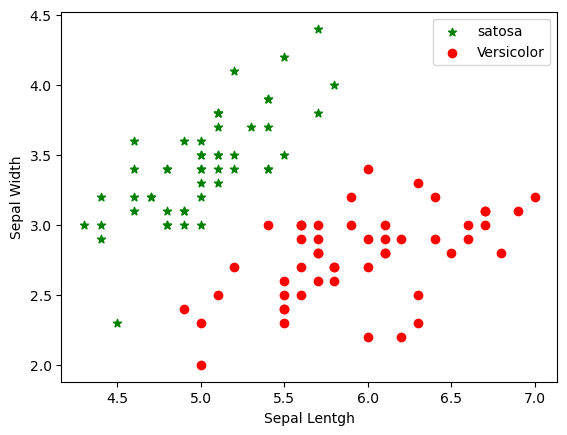

In [31]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green',marker='*',label='satosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='o',label='Versicolor')
plt.legend()
plt.xlabel('Sepal Lentgh')
plt.ylabel('Sepal Width')
plt.show()

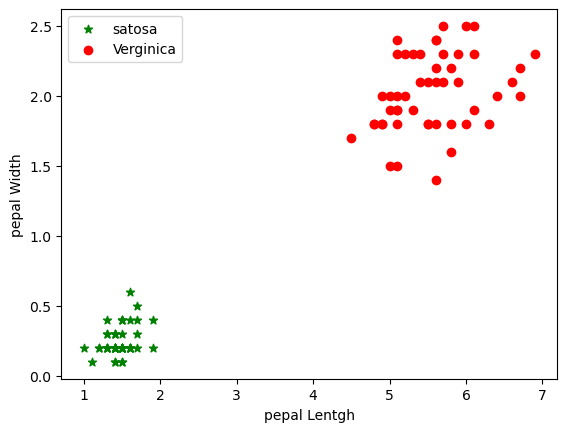

In [33]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green',marker='*',label='satosa')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',marker='o',label='Verginica')
plt.legend()
plt.xlabel('pepal Lentgh')
plt.ylabel('pepal Width')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X=df.drop(['target','Flower_Name'],axis='columns')
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(120, 4)

In [37]:
X_test.shape

(30, 4)

In [38]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train,y_train)


SVC(kernel='linear')

In [39]:
model.score(X_train,y_train)

0.975

In [46]:

from sklearn.svm import SVC

import matplotlib.pyplot as plt
X=[
    [18,30], #age,boobs_size
    [20,32],
    [21,34],
    [22,36],
    [23,38],
    [24,40],
    [25,42],
]
y=[0,0,0,0,1,1,1] #small_boobs,bigboobs

model=SVC(kernel='linear')
model.fit(X,y)
model.predict([[23,44]])

array([1])

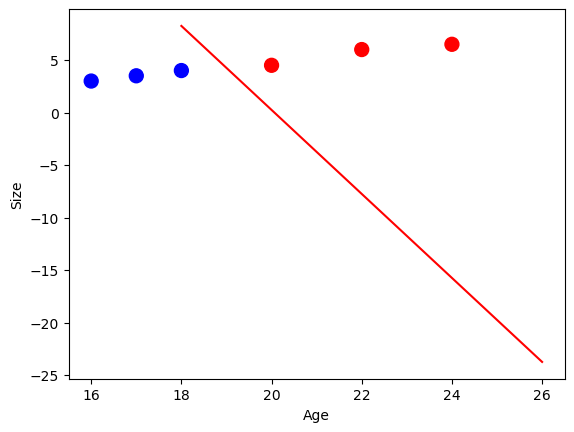

In [57]:
import numpy as np
x=np.array(X)
y=np.array(y)

plt.scatter(x[:,0],x[:,1],c=y,cmap='bwr',s=100)

w=model.coef_[0]
b=model.intercept_[0]

xpoints=np.linspace(18,26)
ypoints=-(w[0]*xpoints+b)/w[1]
plt.plot(xpoints,ypoints,color='red')

plt.xlabel('Age')
plt.ylabel("Size")
plt.show()

Big Penis


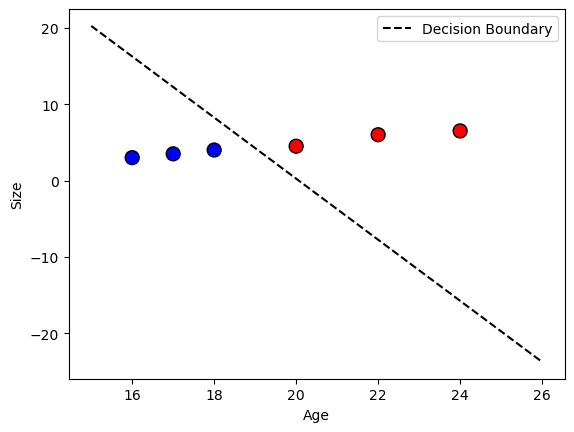

In [55]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Data
X = [
    [16, 3],
    [17, 3.5],
    [18, 4],
    [20, 4.5],
    [22, 6],
    [24, 6.5]
]
y = [0, 0, 0, 1, 1, 1]

model=SVC(kernel='linear')
model.fit(X,y)
n=model.predict([[25,4.8]])

if n==1:
    print('Big Penis')
else:
    print('Small Penis')

x=np.array(X)
y=np.array(y)

plt.scatter(x[:,0],x[:,1],c=y,cmap='bwr',edgecolor='k',s=100)

xpoints=np.linspace(15,26,100)

w=model.coef_[0]
b=model.intercept_[0]
ypoints=-(w[0]*xpoints+b)/w[1]

plt.plot(xpoints,ypoints,'k--',label='Decision Boundary')

plt.xlabel('Age')
plt.ylabel("Size")
plt.legend()
plt.show()


In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Iris dataset লোড করো
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 2: Train-test ভাগ করো
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: ডেটা স্কেল করো (SVM এর জন্য দরকার)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: SVM মডেল বানাও (kernel = 'linear'/'rbf' ব্যবহার করতে পারো)
model = SVC(kernel='linear')  # Try 'rbf' or 'poly' also
model.fit(X_train, y_train)

# Step 5: Prediction
y_pred = model.predict(X_test)

# Step 6: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



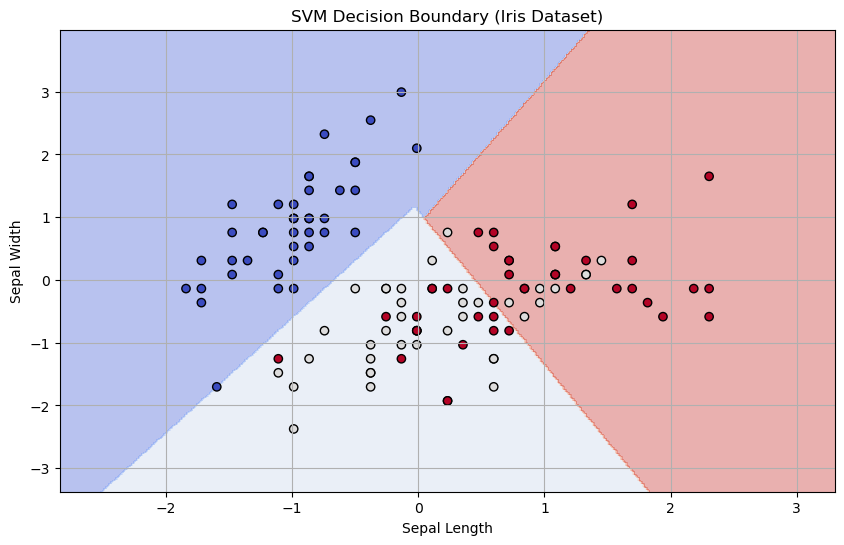

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Step 1: Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # শুধুমাত্র প্রথম দুই ফিচার (2D plot এর জন্য)
y = iris.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train SVM Model
model = SVC(kernel='linear')  # তুমি চাইলে 'rbf', 'poly' ও ব্যবহার করতে পারো
model.fit(X_train, y_train)

# Step 5: Plotting Function
def plot_decision_boundary(X, y, model):
    h = 0.02  # step size for meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and data points
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM Decision Boundary (Iris Dataset)')
    plt.grid(True)
    plt.show()

# Step 6: Call the plot function
plot_decision_boundary(X_train, y_train, model)


In [60]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: SVM Model
model = SVC(kernel='linear')  # try 'rbf', 'poly' later
model.fit(X_train, y_train)

# Step 5: Prediction
y_pred = model.predict(X_test)

# Step 6: Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


✅ Accuracy: 0.956140350877193
📊 Confusion Matrix:
 [[41  2]
 [ 3 68]]
📋 Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      0.95      0.94        43
      benign       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



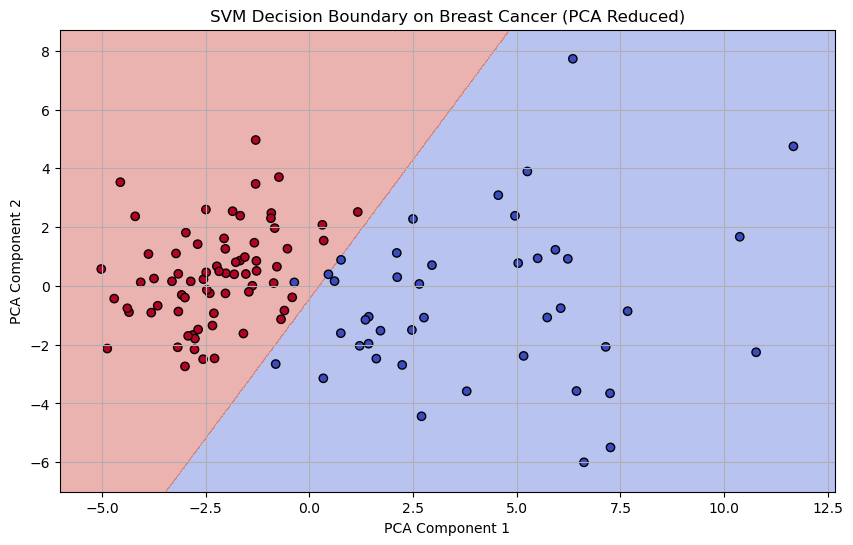

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Step 1: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 5: Train SVM model
model = SVC(kernel='linear')  # Try 'rbf' or 'poly' if you want
model.fit(X_train, y_train)

# Step 6: Plot decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Step 7: Plotting
plot_decision_boundary(X_test, y_test, model, "SVM Decision Boundary on Breast Cancer (PCA Reduced)")


In [62]:
#Alhamdulillah Completed 